In [31]:
%matplotlib inline
import tifffile as tiff
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import Tensor

/home/dkermany/.local/share/virtualenvs/BoneSegmentation-C6QGg7XR/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
image = tiff.imread("/home/dkermany/data/Bone_Project/final/Train/Images/452-Ves-Ki67-GFP-Reparing Front-Bone Surface.tif")
label = cv2.imread("/home/dkermany/data/Bone_Project/final/Train/Labels/452-Ves-Vessels.png", 0)

(3300, 6480)
(3300, 6480)


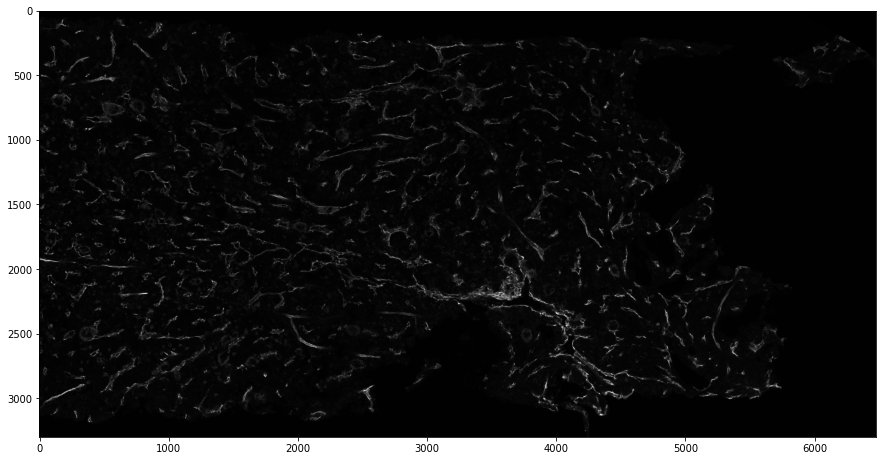

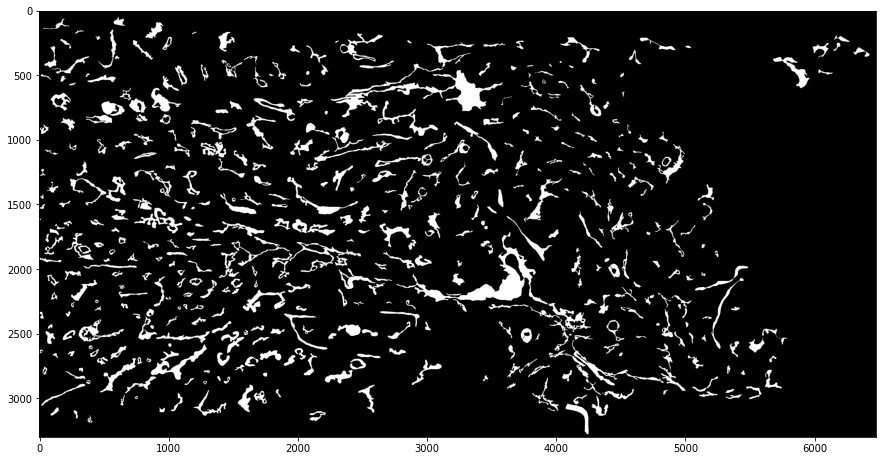

In [35]:
plt.figure(figsize=(15,15))
plt.imshow(image[2], cmap="gray")
print(image[2].shape)

plt.figure(figsize=(15,15))
plt.imshow(label, cmap="gray")
print(label.shape)

In [25]:
def to_shape(a, shape):
    y_, x_ = shape
    y, x = a.shape
    y_pad = (y_-y)
    x_pad = (x_-x)
    return np.pad(a,((y_pad//2, y_pad//2 + y_pad%2), 
                     (x_pad//2, x_pad//2 + x_pad%2)),
                  mode = 'constant')

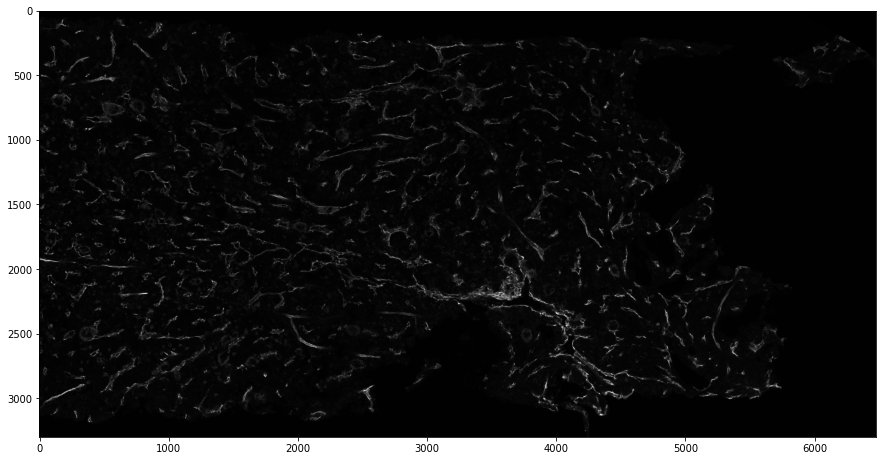

In [39]:
to_shape(image[2], (1024*4, 1024*7)).shape
plt.figure(figsize=(15,15))
plt.imshow(image[2], cmap="gray")

In [32]:
def get_patches(data: np.ndarray, targets: np.ndarray, image_size: int, batch_size: int = 1) -> tuple[np.ndarray]:
    assert data.shape[2] % image_size == 0
    assert targets.shape[2] % image_size == 0

    # Patches per image
    ppi = int(data.shape[2] / image_size) ** 2
    final_data = np.zeros((
        ppi * batch_size,
        3,
        image_size,
        image_size,
    ))
    final_targets = np.zeros((
        ppi * batch_size,
        image_size,
        image_size,
    ))
    for i, image in enumerate(list(data)):
        data_patches = patchify(
            image,
            (3, image_size, image_size),
            step=image_size,
        ).reshape(-1, 3, image_size, image_size)
        final_data[i*ppi: (i+1)*ppi] = data_patches
    for i, target in enumerate(list(targets)):
        targets_patches = patchify(
            target,
            (image_size, image_size),
            step=image_size,
        ).reshape(-1, image_size, image_size)
        final_targets[i*ppi: (i+1)*ppi] = targets_patches
    return final_data, final_targets


In [48]:
from patchify import patchify, unpatchify

patches = patchify(cv2.resize(image[2], (3072, 6144), interpolation=cv2.INTER_AREA), (1024,1024), step=1024)
label_patches = patchify(cv2.resize(label, (3072, 6144), interpolation=cv2.INTER_AREA), (1024,1024), step=1024)

for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        cv2.imwrite(f"/home/dkermany/data/Bone_Project/final/Train/Images/test1_{i+1}x{j+1}.png", patches[i][j])
#         plt.figure()
#         plt.imshow(patches[i][j], cmap="gray")
        cv2.imwrite(f"/home/dkermany/data/Bone_Project/final/Train/Labels/test1_{i+1}x{j+1}_mask.png", label_patches[i][j])
#         plt.figure()
#         plt.imshow(label_patches[i][j], cmap="gray")

# new_img = unpatchify(patches)

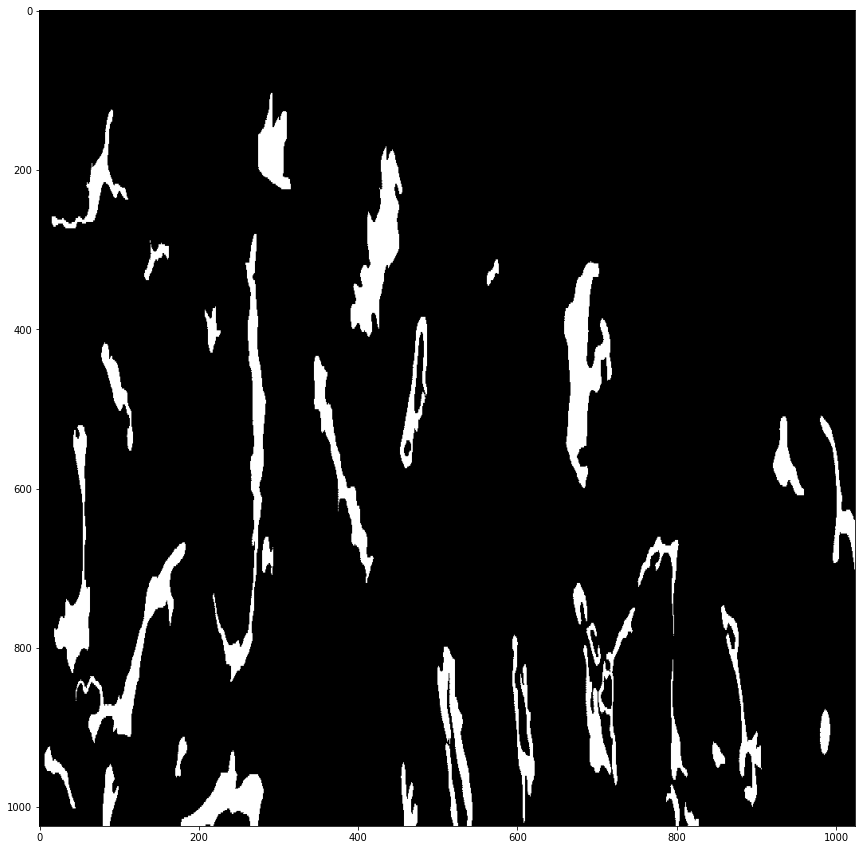

In [52]:
i = cv2.imread("/home/dkermany/data/Bone_Project/final/Train/Labels/test1_1x1_mask.png")
i = cv2.imread("/home/dkermany/data/Bone_Project/final/Train/Labels/test1_1x1_mask.png")
plt.figure(figsize=(15,15))
plt.imshow(i*255, cmap="gray")
plt.figure(figsize=(15,15))
plt.imshow(i*255, cmap="gray")